In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
data = pd.read_csv('/content/drive/MyDrive/Sentiment_analysis/amzon_review_sample')
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,198665,198666,B002AQL00G,A3F5NVW7GHULYS,"Maura M. Rawn ""CasualComments""",0,0,5,1321747200,Great cookies mix - even better with alteratio...,This is a very delicious GF chocolate chip coo...
1,220124,220125,B005BFJGJU,AMOMWUNIC85NE,Guy,5,6,1,1323734400,WOW talk about small box,So we ordered this for our daughter for Christ...
2,76241,76242,B0036EYL8E,A7EJERNB7IK3Z,CQ DX,1,1,5,1292112000,A godsend for kids that don't like veggies! G...,This is a fantastic product for kids who norma...
3,198445,198446,B000FVBYCW,A2EMM13TIU7IML,I. Santos,1,2,1,1298592000,Not even close...,"This was a waste of money, the item was late, ..."
4,253103,253104,B001SB00M8,A28XITD7P0ZU3Z,R. Gold,0,0,5,1264550400,This stuff is magic!,I am a sloppy eater and always seem to get stu...


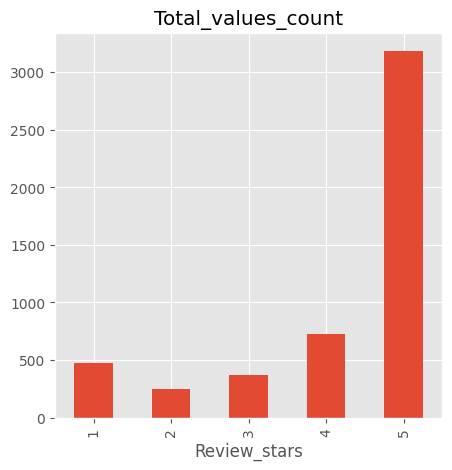

In [ ]:
# simple EDA
ax = data['Score'].value_counts().sort_index().plot(kind = 'bar',title = 'Total_values_count',figsize = (5,5) )
ax.set_xlabel('Review_stars')
plt.show()

# VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [ ]:
# VADER does not account for relationship between each word it only focus on how positive or negative sentiment(txt) is.

In [ ]:
example = data['Text'][:1][0]
example

'This is a very delicious GF chocolate chip cookie mix but I have found that I like it even better when I add an extra egg - it gives them more hold.<br /><br />Also tastes great if you add that extra egg PLUS add 1/2-3/4 cup peanut butter.<br /><br />I definitely recomment this product! I have it on Amazon auto-ship :)'

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('today, I am so happy.')

{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.6948}

In [ ]:
sia.polarity_scores('today, I am so sad.')

{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.6113}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.978}

In [ ]:
res = {}
for i, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Text']
    my_id = row['Id']
    res[my_id] = sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(data, how = 'left').drop(columns = ['Unnamed: 0'])
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,198666,0.000,0.656,0.344,0.9780,B002AQL00G,A3F5NVW7GHULYS,"Maura M. Rawn ""CasualComments""",0,0,5,1321747200,Great cookies mix - even better with alteratio...,This is a very delicious GF chocolate chip coo...
1,220125,0.073,0.796,0.131,0.3367,B005BFJGJU,AMOMWUNIC85NE,Guy,5,6,1,1323734400,WOW talk about small box,So we ordered this for our daughter for Christ...
2,76242,0.147,0.700,0.153,0.5166,B0036EYL8E,A7EJERNB7IK3Z,CQ DX,1,1,5,1292112000,A godsend for kids that don't like veggies! G...,This is a fantastic product for kids who norma...
3,198446,0.397,0.603,0.000,-0.9154,B000FVBYCW,A2EMM13TIU7IML,I. Santos,1,2,1,1298592000,Not even close...,"This was a waste of money, the item was late, ..."
4,253104,0.000,0.937,0.063,0.6923,B001SB00M8,A28XITD7P0ZU3Z,R. Gold,0,0,5,1264550400,This stuff is magic!,I am a sloppy eater and always seem to get stu...


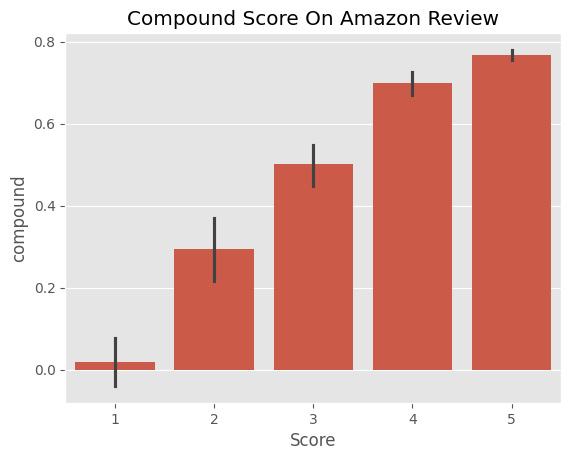

In [ ]:
# ploting vaders on score
ax = sns.barplot(data=vaders, x= "Score", y="compound" )
ax.set_title('Compound Score On Amazon Review')
plt.show()

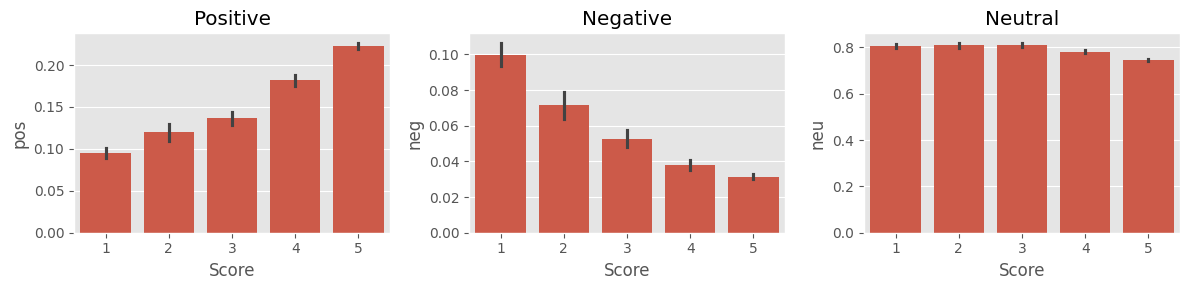

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (12,3))
sns.barplot(data = vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data = vaders, x='Score', y='neg', ax = axs[1])
sns.barplot(data = vaders, x='Score', y='neu', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [ ]:
import transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
model_name = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenize = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:

import re

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<br\s?/?>', ' ', text)
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

def roberta_model(x):
    cleaned_txt =  preprocess_text(x)
    encoded_txt = tokenize(cleaned_txt, return_tensors='pt', truncation=True, padding=True)
    output = model(**encoded_txt)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'Roberta_Neg':scores[0],'Roberta_Neut':scores[1],'Roberta_Pos':scores[2]}
    return scores_dict

res1 = {}

for i, row in tqdm(data[:100].iterrows(), total = len(data[:100])):
    try:
        txt = row['Text']
        my_id = row['Id']
        vader = sia.polarity_scores(txt)
        vader_result_rename = {}
        for k, v in vader.items():
            vader_result_rename[f"vaders_{k}"] = round(v,3)
        r_m = roberta_model(txt)
        res1[my_id] = {**vader_result_rename,**r_m}
    except RuntimeError:
        print(f"broke for id:- {my_id}")

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# here runtime error occured because of gpu

In [ ]:
ex = roberta_model(example)
ex

{'Roberta_Neg': 0.0014815384,
 'Roberta_Neut': 0.009894492,
 'Roberta_Pos': 0.988624}

In [ ]:
# An Index out of range occcured on this example (to see why the error occured i printed the example)

# The error likely occurs because the input text contains HTML tags (<br />) and special characters that need to be preprocessed before tokenization.
# We can clean the text by removing HTML tags and special characters using regular expressions.

index_er_txt = data[1291:1292]['Text'][1291]
index_er_txt

'I HAVE ENJOYED THIS CANDY FOR MANY, MANY YEARS. THIS MAY SOUND VERY WIERD TO SOME FOLKS.........BUT I AM STRICKEN WITH POST POLIO SINCE 1987. I HAD POLIO AS A BABY IN 1939 AND CAME VERY CLOSE TO DEATH AND IT DID LEAVE ME DEFORMED. THE POLIO CAUSES CONSTANT PAIN EVERY SECOND OF THE DAY.........I CAN ONLY TAKE THE PRESCRIBED AMOUNT OF PAIN MED. SO........<br />IN DESPERATION..........I SEARCH FOR ANYTHING, OTHER THAN MY TENS UNIT AND NARCOTIC MED, TO GIVE ANY AMOUNT OF DISTRACTION FROM THE PAIN. CANDY SUCH AS THIS DOES, IN FACT, PROVIDE A BIT OF DISTRACTION AND A LITTLE JOY.......AND HAS DONE SO SINCE THE ONSET OF PAIN.<br /><br />DOCTORS? YES, I HAVE SEEN OVER 60 OF THEM, HAVE EVERY TEST AND TREATMENT KNOWN TO MAN.....THE PAIN DOES NOT STOP AND I AM ASHAMED TO TAKE PAIN MED, BUT IT PROVIDES AN HOUR OR SO OF RELIEF. NOW....THIS CANDY, PROVIDES A SORT OF SPECIAL DISTRACTION FROM THE PAIN BECAUSE IT BRINGS BACK  JOYS FROM MY YOUNGER YEARS, AGAIN, I AM OLD.........YEAR 73 IS RAPIDLY APPROA

In [ ]:
ans = pd.DataFrame(res1).T.reset_index().rename(columns = {'index':'Id'})
ans =ans.merge(sample_df[['Id','Score','Text']], how = 'left')
ans.head(2)

,Id,vaders_neg,vaders_neu,vaders_pos,vaders_compound,Roberta_Neg,Roberta_Neut,Roberta_Pos,Score,Text
0,198666,0.000,0.656,0.344,0.978,0.001482,0.009894,0.988624,5,This is a very delicious GF chocolate chip coo...
1,220125,0.073,0.796,0.131,0.337,0.066680,0.282746,0.650575,1,So we ordered this for our daughter for Christ...


In [ ]:
ans.iloc[1]['Text']

'So we ordered this for our daughter for Christmas and when they arrived WOW was i surprised !!! Not only did we only get one box but the box we did get was CRAZY small. Top of 15 beans! i would have NEVER ordered if i had know the box was so small'

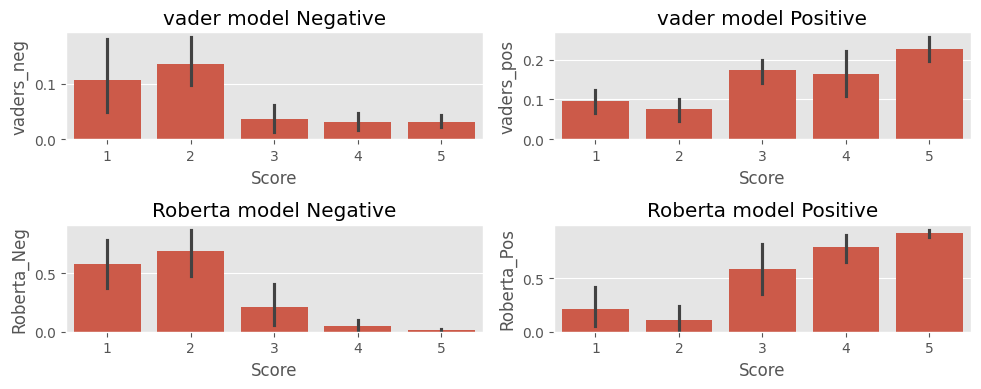

In [ ]:
figs, axes = plt.subplots(2,2, figsize=(10,4))
axes = axes.flatten()
sns.barplot(data = ans, x='Score', y='vaders_neg', ax = axes[0])
sns.barplot(data = ans, x='Score', y='vaders_pos', ax= axes[1])
sns.barplot(data = ans, x='Score', y='Roberta_Neg', ax= axes[2])
sns.barplot(data = ans, x='Score', y='Roberta_Pos', ax= axes[3])
axes[0].set_title('vader model Negative')
axes[1].set_title('vader model Positive')
axes[2].set_title('Roberta model Negative')
axes[3].set_title('Roberta model Positive')
plt.tight_layout()
plt.show()